In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows' , 60)

In [3]:
df = pd.read_csv('municipality_bus_utilization.csv')
df.head(10)

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
5,2017-06-04 07:59:42,5,70,587
6,2017-06-04 07:59:42,2,273,697
7,2017-06-04 07:59:42,1,129,397
8,2017-06-04 07:59:42,6,597,3113
9,2017-06-04 07:59:42,3,623,1930


In [4]:
df.tail(10)

,timestamp,municipality_id,usage,total_capacity
13060,2017-08-19 16:30:35,4,2542,3893
13061,2017-08-19 16:30:35,1,396,397
13062,2017-08-19 16:30:35,0,1271,2813
13063,2017-08-19 16:30:35,9,815,1332
13064,2017-08-19 16:30:35,5,202,587
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113
13069,2017-08-19 16:30:35,3,1189,1930


In [5]:
df.shape

(13070, 4)

In [6]:
df['free_to_use'] = df['total_capacity'] - df['usage']
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665
13068,2017-08-19 16:30:35,6,1680,3113,1433


In [7]:
(df['free_to_use'] <= 0).sum()

241

In [8]:
(df['free_to_use'] < 0 ).sum()

229

In [9]:
df[df['free_to_use'] < 0 ]

,timestamp,municipality_id,usage,total_capacity,free_to_use
7618,2017-07-17 12:04:02,1,399,397,-2
7621,2017-07-17 12:31:03,1,401,397,-4
7635,2017-07-17 13:04:03,1,399,397,-2
7648,2017-07-17 13:31:03,1,403,397,-6
7659,2017-07-17 14:04:03,1,403,397,-6
...,...,...,...,...,...
13010,2017-08-19 14:03:31,1,408,397,-11
13026,2017-08-19 14:30:33,1,410,397,-13
13037,2017-08-19 15:03:34,1,408,397,-11
13048,2017-08-19 15:29:33,1,411,397,-14


In [10]:
df['free_to_use'].min()

-15

In [11]:
df[df['free_to_use'] < 0 ]['municipality_id'].value_counts() # All wrong data in same municipality. Or maybe municipality's total_capacity may be wrong. 
                                                             # Maybe everything is right, the municipality needs a bigger capacity

1    229
Name: municipality_id, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
 4   free_to_use      13070 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 510.7+ KB


In [13]:
df = df.sort_values('timestamp' , ascending=True)
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587,385
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665


In [14]:
df['timestamp'].value_counts(dropna=False) # There may be 2 misspelled data

2017-06-04 07:59:42    10
2017-07-22 15:31:37    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
2017-07-23 14:30:43    10
                       ..
2017-08-19 16:30:35    10
2017-06-16 14:34:14     9
2017-08-11 08:25:43     9
2017-06-16 14:27:13     1
2017-08-11 08:19:39     1
Name: timestamp, Length: 1309, dtype: int64

In [15]:
df[df['timestamp'] == '2017-06-16 14:27:13']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2290,2017-06-16 14:27:13,5,189,587,398


In [16]:
df[df['timestamp'] == '2017-06-16 14:34:14']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2299,2017-06-16 14:34:14,8,877,2947,2070
2298,2017-06-16 14:34:14,6,983,3113,2130
2297,2017-06-16 14:34:14,2,549,697,148
2296,2017-06-16 14:34:14,0,497,2813,2316
2294,2017-06-16 14:34:14,1,338,397,59
2293,2017-06-16 14:34:14,7,1294,2019,725
2292,2017-06-16 14:34:14,3,803,1930,1127
2291,2017-06-16 14:34:14,4,1348,3893,2545
2295,2017-06-16 14:34:14,9,754,1332,578


In [17]:
df[df['timestamp'] == '2017-08-11 08:19:39']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11480,2017-08-11 08:19:39,3,313,1930,1617


In [18]:
df[df['timestamp'] == '2017-08-11 08:25:43']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11487,2017-08-11 08:25:43,0,344,2813,2469
11489,2017-08-11 08:25:43,1,132,397,265
11488,2017-08-11 08:25:43,6,808,3113,2305
11486,2017-08-11 08:25:43,2,369,697,328
11484,2017-08-11 08:25:43,9,379,1332,953
11483,2017-08-11 08:25:43,5,11,587,576
11482,2017-08-11 08:25:43,8,450,2947,2497
11481,2017-08-11 08:25:43,4,782,3893,3111
11485,2017-08-11 08:25:43,7,739,2019,1280


In [19]:
# df[df['timestamp'] == '2017-06-16 14:27:13']['timestamp'] = '2017-06-16 14:34:14'

In [20]:
df.loc[df['timestamp'] == '2017-06-16 14:27:13', 'timestamp'] = '2017-06-16 14:34:14'
df.loc[df['timestamp'] == '2017-08-11 08:19:39', 'timestamp'] = '2017-08-11 08:25:43' # Yes, it was a typo and it has been corrected.

In [21]:
df['timestamp'].value_counts(dropna=False)

2017-06-04 07:59:42    10
2017-07-22 15:57:37    10
2017-07-23 16:04:46    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
                       ..
2017-06-30 08:26:02    10
2017-06-30 08:25:53    10
2017-06-30 08:00:03    10
2017-06-30 07:59:55    10
2017-08-19 16:30:35    10
Name: timestamp, Length: 1307, dtype: int64

In [22]:
df['municipality_id'].value_counts(dropna=False)

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [23]:
df['total_capacity'].value_counts(dropna=False)

1332    1307
2947    1307
3893    1307
2813    1307
2019    1307
587     1307
697     1307
397     1307
3113    1307
1930    1307
Name: total_capacity, dtype: int64

In [24]:
df['usage'].value_counts(dropna=False)

411     69
354     62
399     31
410     28
623     27
        ..
3376     1
3318     1
3238     1
2372     1
2542     1
Name: usage, Length: 2346, dtype: int64

In [25]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        13070 non-null  datetime64[ns]
 1   municipality_id  13070 non-null  int64         
 2   usage            13070 non-null  int64         
 3   total_capacity   13070 non-null  int64         
 4   free_to_use      13070 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 612.7 KB


In [27]:
# df.groupby('timestamp').max()[['usage','free_to_use']]

In [28]:
# df.groupby('timestamp')[['usage','free_to_use']].min()

In [29]:
# df['timestamp'].head(50)

In [30]:
# df['timestamp'].tail(50)

In [31]:
# df['timestamp'][0].second

In [32]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].minute == 0 :
#         print(i)




# Indexes with timestamps at 0 minutes 
# # 3400 to 12659



In [33]:
df.iloc[3400,:]

timestamp          2017-06-24 16:00:04
municipality_id                      2
usage                              459
total_capacity                     697
free_to_use                        238
Name: 3409, dtype: object

In [34]:
df.iloc[12659,:]

timestamp          2017-08-17 14:00:17
municipality_id                      9
usage                              970
total_capacity                    1332
free_to_use                        362
Name: 12654, dtype: object

In [35]:
df.iloc[13039,:]

timestamp          2017-08-19 15:03:34
municipality_id                      7
usage                             1618
total_capacity                    2019
free_to_use                        401
Name: 13033, dtype: object

In [36]:
# df.iloc[3340:3370,:].head(80)

In [37]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].hour == 7 :
#         print(i)

In [38]:
df['timestamp'][0]

Timestamp('2017-06-04 07:59:42')

In [39]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [40]:
df['hour'].value_counts(sort=True)

13    1520
9     1490
11    1460
8     1450
14    1450
15    1450
12    1420
10    1410
16    1160
7      260
Name: hour, dtype: int64

In [41]:
df['timestamp'] = df['timestamp'] + pd.Timedelta(minutes=5 , seconds=10) 
# By adding 5 minutes and 10 seconds, I included the border measurements in the next hours. In this way, I achieved a more uniform distribution.

In [42]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [43]:
df['hour'].value_counts() # Almost perfect now 

10    1460
12    1460
14    1460
15    1460
9     1450
11    1450
13    1450
8     1440
16    1440
Name: hour, dtype: int64

In [44]:
# df[df['hour'] == 7]['municipality_id'].value_counts()

In [45]:
# df[df['hour'] == 7]['timestamp'].tail(60) # All 7. o'clock measurements are near to 8 o'clock.

In [46]:
df

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
13064,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
13065,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
13066,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
13067,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


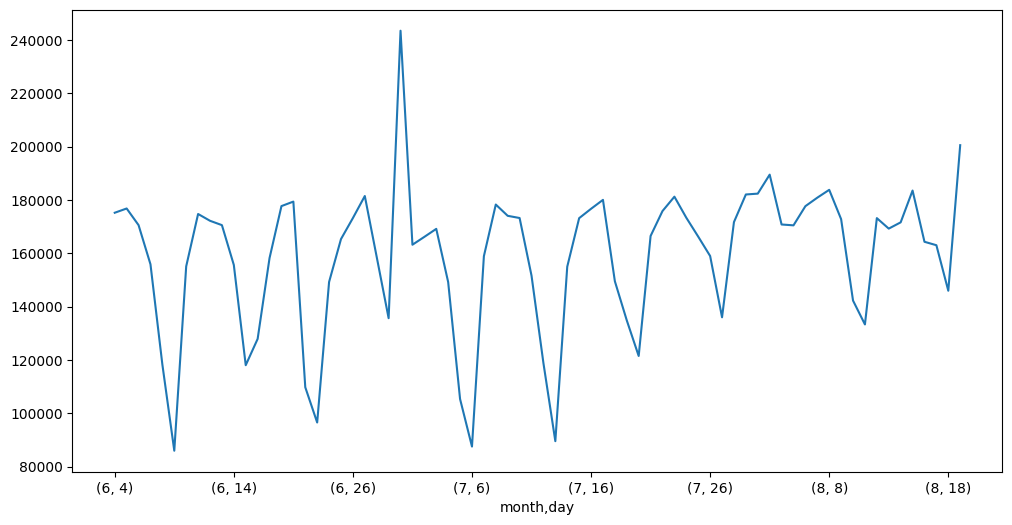

In [47]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].sum().plot();

In [48]:
for x in [6,7,8]:
    for y in range(1,32):
        if df[(df['month'] == x) & (df['day'] == y)]['usage'].sum() == 0 :
            print(f'{x}.Month {y}.day nan')   # We have 20 nan days.

6.Month 1.day nan
6.Month 2.day nan
6.Month 3.day nan
6.Month 20.day nan
6.Month 21.day nan
6.Month 31.day nan
7.Month 31.day nan
8.Month 3.day nan
8.Month 4.day nan
8.Month 20.day nan
8.Month 21.day nan
8.Month 22.day nan
8.Month 23.day nan
8.Month 24.day nan
8.Month 25.day nan
8.Month 26.day nan
8.Month 27.day nan
8.Month 28.day nan
8.Month 29.day nan
8.Month 30.day nan
8.Month 31.day nan


In [49]:
df[(df['month'] == 6) & (df['day'] == 1)]['usage'].sum() # One of the nan days

0

In [50]:
df[(df['month'] == 6) & (df['day'] == 30)]['usage'].sum() # The day doubled.

243461

In [51]:
df[(df['month'] == 6) & (df['day'] == 30)] # 340 data ??? It should have been 170 or 180

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
...,...,...,...,...,...,...,...,...,...
4644,2017-06-30 16:31:16,2,475,697,222,6,30,16,31
4642,2017-06-30 16:31:16,6,892,3113,2221,6,30,16,31
4641,2017-06-30 16:31:16,7,986,2019,1033,6,30,16,31
4640,2017-06-30 16:31:16,9,520,1332,812,6,30,16,31


In [52]:
df.groupby(['month','day']).count() # We have 72 days at total.(20 of them nan)

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[72 rows x 7 columns]

In [53]:
df.groupby(['month','day']).count()['timestamp'].unique() # All of them should have been 180 or 170. Date with 340 data probably doubled

array([180, 170, 340], dtype=int64)

In [54]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 180]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[66 rows x 7 columns]

In [55]:
df[(df['month'] == 6) & (df['day'] == 4)].head(50) # An example of the day with 180 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
5,2017-06-04 08:04:52,5,70,587,517,6,4,8,4
6,2017-06-04 08:04:52,2,273,697,424,6,4,8,4
7,2017-06-04 08:04:52,1,129,397,268,6,4,8,4
8,2017-06-04 08:04:52,6,597,3113,2516,6,4,8,4
9,2017-06-04 08:04:52,3,623,1930,1307,6,4,8,4


In [56]:
df[(df['month'] == 6) & (df['day'] == 28)].head(50) # An example of the day with 170 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
3966,2017-06-28 08:21:51,0,194,2813,2619,6,28,8,21
3968,2017-06-28 08:21:51,5,66,587,521,6,28,8,21
3967,2017-06-28 08:21:51,1,94,397,303,6,28,8,21
3965,2017-06-28 08:21:51,7,733,2019,1286,6,28,8,21
3969,2017-06-28 08:21:51,6,734,3113,2379,6,28,8,21
3963,2017-06-28 08:21:51,4,1175,3893,2718,6,28,8,21
3962,2017-06-28 08:21:51,8,593,2947,2354,6,28,8,21
3961,2017-06-28 08:21:51,2,357,697,340,6,28,8,21
3960,2017-06-28 08:21:51,3,568,1930,1362,6,28,8,21
3964,2017-06-28 08:21:51,9,385,1332,947,6,28,8,21


In [57]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 170]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     28         170              170    170             170          170   
7     18         170              170    170             170          170   
      25         170              170    170             170          170   
8     13         170              170    170             170          170   
      14         170              170    170             170          170   

           hour  min  
month day             
6     28    170  170  
7     18    170  170  
      25    170  170  
8     13    170  170  
      14    170  170

In [58]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 340] # But the reason why it is 340 instead of 180 should be investigated
                                                                                             # Bus services may have been doubled as it coincided with the middle of summer.
                                                                                             # But still, it is wrong to keep records 2 times in a row. We have to drop one of these 2 data

,,timestamp,municipality_id,usage,total_capacity,free_to_use,hour,min
month,day,,,,,,,
6,30,340,340,340,340,340,340,340


In [59]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # It seems clear that 2 measurements were made on the 30th day of June, with an interval of less than 1 minute in a row.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
4313,2017-06-30 08:05:05,2,346,697,351,6,30,8,5
4312,2017-06-30 08:05:05,3,284,1930,1646,6,30,8,5
4311,2017-06-30 08:05:05,0,90,2813,2723,6,30,8,5
4310,2017-06-30 08:05:05,9,396,1332,936,6,30,8,5
4314,2017-06-30 08:05:05,6,666,3113,2447,6,30,8,5


In [60]:
# df['shifted_timestamp'] = df['timestamp'].shift()
# df['difference'] = (df['timestamp'] - df['shifted_timestamp']).dt.total_seconds().abs()
# duplicated_timestamps = df['difference'] <= 600

# df = df[~duplicated_timestamps].drop_duplicates(subset=['municipality_id', 'timestamp'])

# df = df.drop(columns=['shifted_timestamp', 'difference'])

In [61]:
# df[(df['month'] == 6) & (df['day'] == 30)]

In [62]:
# tolerance = pd.Timedelta(seconds=10)
# df = df.drop_duplicates(subset='timestamp', keep='first', inplace=False, ignore_index=False, tolerance=tolerance)

In [63]:
# df['timestamp'] = df['timestamp'].dt.round('min')
# df = df.drop_duplicates(subset=['timestamp','municipality_id'], keep='first')

In [64]:
df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:05:13.000000000',
       '2017-06-30T08:31:03.000000000', '2017-06-30T08:31:12.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:05:10.000000000',
       '2017-06-30T09:31:07.000000000', '2017-06-30T09:31:13.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:05:15.000000000',
       '2017-06-30T10:31:04.000000000', '2017-06-30T10:31:12.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:05:12.000000000',
       '2017-06-30T11:31:05.000000000', '2017-06-30T11:31:14.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:05:14.000000000',
       '2017-06-30T12:31:16.000000000', '2017-06-30T12:32:04.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:12:09.000000000',
       '2017-06-30T13:31:09.000000000', '2017-06-30T13:31:11.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:05:09.000000000',
       '2017-06-30T14:31:15.000000000', '2017-06-30

In [65]:
drop_stamptimes = df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()[[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]]
drop_stamptimes

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:31:03.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:31:07.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:31:04.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:31:05.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:31:16.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:31:09.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:31:15.000000000',
       '2017-06-30T15:05:10.000000000', '2017-06-30T15:32:14.000000000',
       '2017-06-30T16:05:17.000000000'], dtype='datetime64[ns]')

In [66]:
drop_indexes = df[df['timestamp'].isin(drop_stamptimes)].index
drop_indexes

Int64Index([4316, 4318, 4319, 4315, 4317, 4313, 4312, 4311, 4310, 4314,
            ...
            4639, 4638, 4636, 4635, 4637, 4633, 4632, 4631, 4630, 4634],
           dtype='int64', length=170)

In [67]:
df.drop(drop_indexes , axis = 0 , inplace = True)

In [68]:
df.reset_index(drop=True)

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
12895,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
12896,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
12897,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
12898,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


In [69]:
df.groupby(['month','day']).count()['timestamp']

month  day
6      4      180
       5      180
       6      180
       7      180
       8      180
             ... 
8      15     180
       16     180
       17     180
       18     180
       19     180
Name: timestamp, Length: 72, dtype: int64

In [70]:
df.groupby(['month','day']).count()['timestamp'].unique()

array([180, 170], dtype=int64)

In [71]:
df['hour'].value_counts() # Still perfect, nice !

10    1440
12    1440
14    1440
15    1440
9     1430
11    1430
13    1430
16    1430
8     1420
Name: hour, dtype: int64

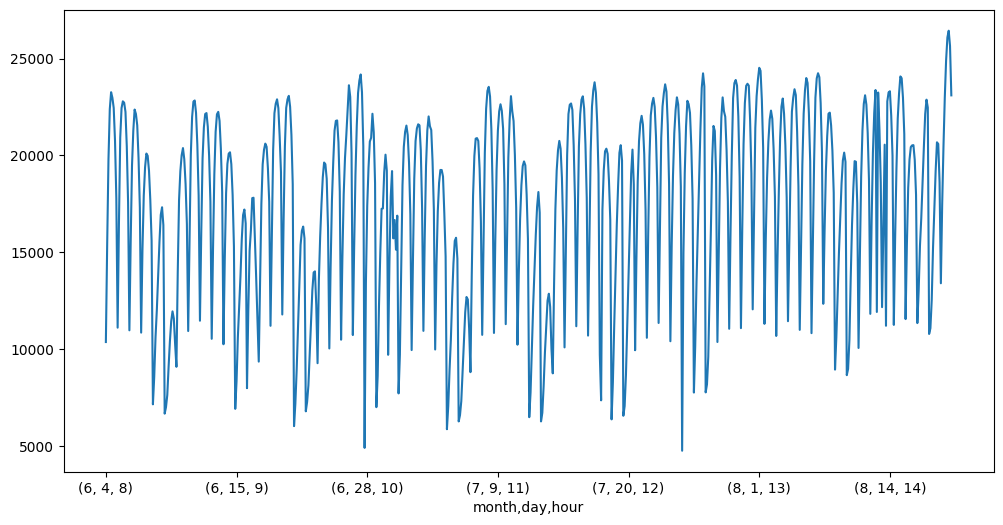

In [72]:
plt.figure(figsize=(12,6))

df.groupby(["month","day",'hour'])["usage"].sum().plot();

In [73]:
df.groupby(["month","day",'hour'])["usage"].sum().describe()

count      648.000000
mean     17498.862654
std       4825.932062
min       4753.000000
25%      14335.750000
50%      18816.500000
75%      21372.500000
max      26442.000000
Name: usage, dtype: float64

In [74]:
nan_hours_counter = 0
risky_hours_counter = 0

for month in range(6,9):
    for day in range(1,31):
        for hour in range(8,17):
            total_usage = df[(df['month'] == month) & (df['day'] == day) & (df['hour'] == hour)]['usage'].sum()
            if total_usage == 0 :
                print(f'Warning ! {month}.month {day}.day and {hour}.hour has 0 total usage and nan hour !!!')
                nan_hours_counter += 1
            elif (total_usage > 24000) | (total_usage < 5000) :
                print(f'{month}.month {day}.day and {hour}.hour has {total_usage} total usage be careful') # Anormal day and hours.
                risky_hours_counter += 1

print(f"Total nan hours : {nan_hours_counter}")
print(f"Total risky hours : {risky_hours_counter}")

Warning ! 6.month 1.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 12.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 13.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 14.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 15.hour has 0 total usage and nan hour !!!
Warning ! 6.month 1.day and 16.hour has 0 total usage and nan hour !!!
Warning ! 6.month 2.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 2.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 2.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 2.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 2.day and 12.hour has 0 total usage and nan hour !!!
Warning ! 

In [75]:
df[(df['month'] == 6) & (df['day'] == 1) & (df['hour'] == 8)]['usage'].sum() # One of the nan hours.

0

In [76]:
df[(df['month'] == 6) & (df['day'] == 27) & (df['hour'] == 14)]['usage'].sum() # One of the most usage hours

24182

In [77]:
df[(df['month'] == 7) & (df['day'] == 25) & (df['hour'] == 8)]['usage'].sum() # One of the less usage hours

4753

In [78]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # 30.th june normal now.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4472,2017-06-30 08:05:13,1,79,397,318,6,30,8,5
4473,2017-06-30 08:05:13,2,317,697,380,6,30,8,5
4474,2017-06-30 08:05:13,3,578,1930,1352,6,30,8,5
4475,2017-06-30 08:05:13,4,1066,3893,2827,6,30,8,5
4476,2017-06-30 08:05:13,8,513,2947,2434,6,30,8,5
4477,2017-06-30 08:05:13,7,653,2019,1366,6,30,8,5
4478,2017-06-30 08:05:13,9,345,1332,987,6,30,8,5
4479,2017-06-30 08:05:13,5,58,587,529,6,30,8,5
4470,2017-06-30 08:05:13,0,141,2813,2672,6,30,8,5
4471,2017-06-30 08:05:13,6,632,3113,2481,6,30,8,5


# Interpolation (Filling nan hours)

In [79]:
# 6.Month 1-2-3-20-21 , 8.Month 3-4-20-21-22-23-24-25-26-27-28-29-30

# 6.Month 1-2-3-20-21 , 7.Month 31 , 8.Month 3-4-20-21-22-23-24-25-26-27-28-29-30-31

In [80]:
# 9 --> 1332
# 8 --> 2947
# 7 --> 2019
# 6 --> 3113
# 5 --> 587
# 4 --> 3893
# 3 --> 1930
# 2 --> 697
# 1 --> 397
# 0 --> 2813

In [81]:
df.set_index('timestamp' , drop=True , inplace=True)

In [82]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
timestamp,,,,,,,,
2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,5,202,587,385,8,19,16,35
2017-08-19 16:35:45,2,548,697,149,8,19,16,35
2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35


In [83]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [84]:
# start_date = pd.to_datetime("2017-06-03 08:00:00")
# end_date = pd.to_datetime("2017-06-03 16:00:00")

# timestamp_range = pd.date_range(start=start_date, end=end_date, freq='H')


# df_timestamps = pd.DataFrame(index=timestamp_range)


# df_timestamps = df_timestamps.join(df[['municipality_id', 'usage']])
# df_timestamps

In [85]:
# start_date = '2017-06-03 08:00:00'
# end_date = '2017-06-03 16:30:00'
# timestamp_range = pd.date_range(start_date, end_date, freq='30T')

# municipality_ids = df['municipality_id'].unique()

# # Create a list to store the dataframes
# df_list = []

# # Loop through the municipality_ids
# for municipality_id in municipality_ids:
#     # Create a new dataframe for each municipality_id
#     df_temp = pd.DataFrame(index=timestamp_range)
#     df_temp['municipality_id'] = municipality_id
#     df_temp = df_temp.join(df.loc[df['municipality_id'] == municipality_id, 'usage'])
#     # Append the dataframe to the list
#     df_list.append(df_temp)

# # Concatenate the dataframes together
# result_df = pd.concat(df_list)

# result_df = result_df.sort_index()
# result_df

In [86]:
# Define the specific dates to include
specific_dates = ['2017-06-20','2017-06-21',
                  '2017-08-03','2017-08-04','2017-08-20','2017-08-21','2017-08-22','2017-08-23','2017-08-24','2017-08-25','2017-08-26']

# Create a list to store the dataframes
df_list = []

# Loop through the specific dates
for date in specific_dates:
    # Create timestamp range for each day
    timestamp_range = pd.date_range(date + ' 08:00:00', date + ' 16:30:00', freq='30T')

    # Get the unique municipality ids for that date
    municipality_ids = df['municipality_id'].unique()
    
    # Loop through the municipality_ids
    for municipality_id in municipality_ids:
        # Create a new dataframe for each municipality_id
        df_temp = pd.DataFrame(index=timestamp_range)
        df_temp['municipality_id'] = municipality_id
        df_temp = df_temp.join(df.loc[(df['municipality_id'] == municipality_id) & (df.index.date == date), 'usage'])
        # Append the dataframe to the list
        df_list.append(df_temp)

# Concatenate the dataframes together
result_df = pd.concat(df_list)

result_df = result_df.sort_index()

In [87]:
result_df

,municipality_id,usage
2017-06-20 08:00:00,9,NaN
2017-06-20 08:00:00,0,NaN
2017-06-20 08:00:00,7,NaN
2017-06-20 08:00:00,8,NaN
2017-06-20 08:00:00,5,NaN
...,...,...
2017-08-26 16:30:00,1,NaN
2017-08-26 16:30:00,9,NaN
2017-08-26 16:30:00,4,NaN
2017-08-26 16:30:00,7,NaN


In [88]:
df = pd.concat([df,result_df],ignore_index=False).sort_index()
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332.0,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947.0,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893.0,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813.0,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019.0,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-26 16:30:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='ffill'))
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='bfill'))

In [90]:
df['total_capacity'] = df.replace({'municipality_id': {9: 1332, 8: 2947, 7: 2019, 6: 3113, 5: 587, 4: 3893, 3: 1930, 2: 687, 1: 397, 0: 2813}})['municipality_id']

In [91]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-26 16:30:00,5,NaN,587,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,1,NaN,397,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,9,NaN,1332,NaN,NaN,NaN,NaN,NaN
2017-08-26 16:30:00,4,NaN,3893,NaN,NaN,NaN,NaN,NaN


In [92]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [93]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['min'] = df.index.minute

In [94]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,878.0,6,4,8,4
2017-06-04 08:04:52,8,556.0,2947,2391.0,6,4,8,4
2017-06-04 08:04:52,4,1090.0,3893,2803.0,6,4,8,4
2017-06-04 08:04:52,0,204.0,2813,2609.0,6,4,8,4
2017-06-04 08:04:52,7,718.0,2019,1301.0,6,4,8,4
...,...,...,...,...,...,...,...,...
2017-08-26 16:30:00,5,NaN,587,NaN,8,26,16,30
2017-08-26 16:30:00,1,NaN,397,NaN,8,26,16,30
2017-08-26 16:30:00,9,NaN,1332,NaN,8,26,16,30
2017-08-26 16:30:00,4,NaN,3893,NaN,8,26,16,30


In [95]:
df.drop('free_to_use' , axis = 1 , inplace = True)

In [96]:
df

,municipality_id,usage,total_capacity,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,6,4,8,4
2017-06-04 08:04:52,8,556.0,2947,6,4,8,4
2017-06-04 08:04:52,4,1090.0,3893,6,4,8,4
2017-06-04 08:04:52,0,204.0,2813,6,4,8,4
2017-06-04 08:04:52,7,718.0,2019,6,4,8,4
...,...,...,...,...,...,...,...
2017-08-26 16:30:00,5,NaN,587,8,26,16,30
2017-08-26 16:30:00,1,NaN,397,8,26,16,30
2017-08-26 16:30:00,9,NaN,1332,8,26,16,30
2017-08-26 16:30:00,4,NaN,3893,8,26,16,30


In [97]:
df.isna().sum()

municipality_id       0
usage              1980
total_capacity        0
month                 0
day                   0
hour                  0
min                   0
dtype: int64

In [98]:
df_0 = df[df['municipality_id'] == 0][['usage']]
df_1 = df[df['municipality_id'] == 1][['usage']]
df_2 = df[df['municipality_id'] == 2][['usage']]
df_3 = df[df['municipality_id'] == 3][['usage']]
df_4 = df[df['municipality_id'] == 4][['usage']]
df_5 = df[df['municipality_id'] == 5][['usage']]
df_6 = df[df['municipality_id'] == 6][['usage']]
df_7 = df[df['municipality_id'] == 7][['usage']]
df_8 = df[df['municipality_id'] == 8][['usage']]
df_9 = df[df['municipality_id'] == 9][['usage']]

In [99]:
df_0.shape

(1488, 1)

In [100]:
df_0

,usage
2017-06-04 08:04:52,204.0
2017-06-04 08:30:52,247.0
2017-06-04 09:04:52,332.0
2017-06-04 09:37:56,429.0
2017-06-04 10:04:58,485.0
...,...
2017-08-26 14:30:00,NaN
2017-08-26 15:00:00,NaN
2017-08-26 15:30:00,NaN
2017-08-26 16:00:00,NaN


In [101]:
df_0.isna().sum() 

usage    198
dtype: int64

In [102]:
df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
df_0 = (df_0.groupby(df_0.index).mean()).replace(0,np.nan) # df_0 = df_0.resample('D').sum()

df_1.index = df_1.index.floor('H') 
df_1 = (df_1.groupby(df_1.index).mean()).replace(0,np.nan)

df_2.index = df_2.index.floor('H') 
df_2 = (df_2.groupby(df_2.index).mean()).replace(0,np.nan)

df_3.index = df_3.index.floor('H') 
df_3 = (df_3.groupby(df_3.index).mean()).replace(0,np.nan)

df_4.index = df_4.index.floor('H') 
df_4 = (df_4.groupby(df_4.index).mean()).replace(0,np.nan)

df_5.index = df_5.index.floor('H') 
df_5 = (df_5.groupby(df_5.index).mean()).replace(0,np.nan)

df_6.index = df_6.index.floor('H') 
df_6 = (df_6.groupby(df_6.index).mean()).replace(0,np.nan)

df_7.index = df_7.index.floor('H') 
df_7 = (df_7.groupby(df_7.index).mean()).replace(0,np.nan)

df_8.index = df_8.index.floor('H') 
df_8 = (df_8.groupby(df_8.index).mean()).replace(0,np.nan)

df_9.index = df_9.index.floor('H') 
df_9 = (df_9.groupby(df_9.index).mean()).replace(0,np.nan)

In [103]:
df_0

,usage
2017-06-04 08:00:00,225.5
2017-06-04 09:00:00,380.5
2017-06-04 10:00:00,509.5
2017-06-04 11:00:00,590.0
2017-06-04 12:00:00,613.5
...,...
2017-08-26 12:00:00,NaN
2017-08-26 13:00:00,NaN
2017-08-26 14:00:00,NaN
2017-08-26 15:00:00,NaN


In [104]:
df_0.isna().sum()

usage    99
dtype: int64

In [105]:
# df_0 = df_0.resample('H').mean()

In [106]:
df_0_pred = df_0[-63:]
df_1_pred = df_1[-63:]
df_2_pred = df_2[-63:]
df_3_pred = df_3[-63:]
df_4_pred = df_4[-63:]
df_5_pred = df_5[-63:]
df_6_pred = df_6[-63:]
df_7_pred = df_7[-63:]
df_8_pred = df_8[-63:]
df_9_pred = df_9[-63:]

In [107]:
df_0_pred

,usage
2017-08-20 08:00:00,NaN
2017-08-20 09:00:00,NaN
2017-08-20 10:00:00,NaN
2017-08-20 11:00:00,NaN
2017-08-20 12:00:00,NaN
...,...
2017-08-26 12:00:00,NaN
2017-08-26 13:00:00,NaN
2017-08-26 14:00:00,NaN
2017-08-26 15:00:00,NaN


In [108]:
df_0_all_train = df_0[:-63]
df_1_all_train = df_1[:-63]
df_2_all_train = df_2[:-63]
df_3_all_train = df_3[:-63]
df_4_all_train = df_4[:-63]
df_5_all_train = df_5[:-63]
df_6_all_train = df_6[:-63]
df_7_all_train = df_7[:-63]
df_8_all_train = df_8[:-63]
df_9_all_train = df_9[:-63]

In [109]:
df_0_all_train

,usage
2017-06-04 08:00:00,225.5
2017-06-04 09:00:00,380.5
2017-06-04 10:00:00,509.5
2017-06-04 11:00:00,590.0
2017-06-04 12:00:00,613.5
...,...
2017-08-19 12:00:00,1280.0
2017-08-19 13:00:00,1282.0
2017-08-19 14:00:00,1284.0
2017-08-19 15:00:00,1284.5


In [110]:
df_0_all_train.isna().sum()

usage    36
dtype: int64

In [111]:
start_date = pd.to_datetime('2017-06-20')
end_date = pd.to_datetime('2017-06-20 23:59:59')

df_0_all_train.loc[(df_0_all_train.index >= start_date) & (df_0_all_train.index <= end_date)] # df.between_time(start_date, end_date)

,usage
2017-06-20 08:00:00,NaN
2017-06-20 09:00:00,NaN
2017-06-20 10:00:00,NaN
2017-06-20 11:00:00,NaN
2017-06-20 12:00:00,NaN
2017-06-20 13:00:00,NaN
2017-06-20 14:00:00,NaN
2017-06-20 15:00:00,NaN
2017-06-20 16:00:00,NaN


In [112]:
df_0_all_train = df_0_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_1_all_train = df_1_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_2_all_train = df_2_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_3_all_train = df_3_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_4_all_train = df_4_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_5_all_train = df_5_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_6_all_train = df_6_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_7_all_train = df_7_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_8_all_train = df_8_all_train.interpolate(method='linear' , axis=0, inplace=False)
df_9_all_train = df_9_all_train.interpolate(method='linear' , axis=0, inplace=False)

In [113]:
df_0_all_train.isna().sum()

usage    0
dtype: int64

In [114]:
start_date = pd.to_datetime('2017-06-20')
end_date = pd.to_datetime('2017-06-20 23:59:59')

df_0_all_train.loc[(df_0_all_train.index >= start_date) & (df_0_all_train.index <= end_date)] # df.between_time(start_date, end_date)
# 1 , 2 , 3

,usage
2017-06-20 08:00:00,656.552632
2017-06-20 09:00:00,624.605263
2017-06-20 10:00:00,592.657895
2017-06-20 11:00:00,560.710526
2017-06-20 12:00:00,528.763158
2017-06-20 13:00:00,496.815789
2017-06-20 14:00:00,464.868421
2017-06-20 15:00:00,432.921053
2017-06-20 16:00:00,400.973684


In [115]:
df_0_all_train

,usage
2017-06-04 08:00:00,225.5
2017-06-04 09:00:00,380.5
2017-06-04 10:00:00,509.5
2017-06-04 11:00:00,590.0
2017-06-04 12:00:00,613.5
...,...
2017-08-19 12:00:00,1280.0
2017-08-19 13:00:00,1282.0
2017-08-19 14:00:00,1284.0
2017-08-19 15:00:00,1284.5


In [116]:
df_0_test = df_0_all_train[-135:]
df_1_test = df_1_all_train[-135:]
df_2_test = df_2_all_train[-135:]
df_3_test = df_3_all_train[-135:]
df_4_test = df_4_all_train[-135:]
df_5_test = df_5_all_train[-135:]
df_6_test = df_6_all_train[-135:]
df_7_test = df_7_all_train[-135:]
df_8_test = df_8_all_train[-135:]
df_9_test = df_9_all_train[-135:]

In [117]:
df_0_test

,usage
2017-08-05 08:00:00,230.5
2017-08-05 09:00:00,357.5
2017-08-05 10:00:00,488.5
2017-08-05 11:00:00,593.0
2017-08-05 12:00:00,654.0
...,...
2017-08-19 12:00:00,1280.0
2017-08-19 13:00:00,1282.0
2017-08-19 14:00:00,1284.0
2017-08-19 15:00:00,1284.5


In [118]:
df_0_train = df_0_all_train[:-135]
df_1_train = df_1_all_train[:-135]
df_2_train = df_2_all_train[:-135]
df_3_train = df_3_all_train[:-135]
df_4_train = df_4_all_train[:-135]
df_5_train = df_5_all_train[:-135]
df_6_train = df_6_all_train[:-135]
df_7_train = df_7_all_train[:-135]
df_8_train = df_8_all_train[:-135]
df_9_train = df_9_all_train[:-135]

In [119]:
df_0_train

,usage
2017-06-04 08:00:00,225.500000
2017-06-04 09:00:00,380.500000
2017-06-04 10:00:00,509.500000
2017-06-04 11:00:00,590.000000
2017-06-04 12:00:00,613.500000
...,...
2017-08-04 12:00:00,334.842105
2017-08-04 13:00:00,313.973684
2017-08-04 14:00:00,293.105263
2017-08-04 15:00:00,272.236842


In [120]:
df_0_train.isna().sum()

usage    0
dtype: int64

In [121]:
df_0_all_train

,usage
2017-06-04 08:00:00,225.5
2017-06-04 09:00:00,380.5
2017-06-04 10:00:00,509.5
2017-06-04 11:00:00,590.0
2017-06-04 12:00:00,613.5
...,...
2017-08-19 12:00:00,1280.0
2017-08-19 13:00:00,1282.0
2017-08-19 14:00:00,1284.0
2017-08-19 15:00:00,1284.5


In [122]:
# plt.plot(df_0_train['usage'], label="original data")

# plt.plot(df_0_train_interpolated['usage'], label="linear interpolated data")

# plt.xlabel("timestamp")
# plt.ylabel("usage")

# plt.legend()
# plt.show()

# Modelling

## 1) Prophet Model

In [123]:
df_0_train_prop = df_0_train.copy()
df_0_test_prop = df_0_test.copy()
df_0_all_train_prop = df_0_all_train.copy()
df_0_pred_prop = df_0_pred.copy()

In [124]:
df_0_train_prop['ds'] = df_0_train_prop.index
df_0_train_prop.reset_index(inplace=True , drop = True)
df_0_train_prop = df_0_train_prop.iloc[:,[1,0]]
df_0_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_train_prop

,ds,y
0,2017-06-04 08:00:00,225.500000
1,2017-06-04 09:00:00,380.500000
2,2017-06-04 10:00:00,509.500000
3,2017-06-04 11:00:00,590.000000
4,2017-06-04 12:00:00,613.500000
...,...,...
544,2017-08-04 12:00:00,334.842105
545,2017-08-04 13:00:00,313.973684
546,2017-08-04 14:00:00,293.105263
547,2017-08-04 15:00:00,272.236842


In [125]:
df_0_test_prop['ds'] = df_0_test_prop.index
df_0_test_prop.reset_index(inplace=True , drop = True)
df_0_test_prop = df_0_test_prop.iloc[:,[1,0]]
df_0_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_prop

,ds,y
0,2017-08-05 08:00:00,230.5
1,2017-08-05 09:00:00,357.5
2,2017-08-05 10:00:00,488.5
3,2017-08-05 11:00:00,593.0
4,2017-08-05 12:00:00,654.0
...,...,...
130,2017-08-19 12:00:00,1280.0
131,2017-08-19 13:00:00,1282.0
132,2017-08-19 14:00:00,1284.0
133,2017-08-19 15:00:00,1284.5


In [126]:
df_0_all_train_prop['ds'] = df_0_all_train_prop.index
df_0_all_train_prop.reset_index(inplace=True , drop = True)
df_0_all_train_prop = df_0_all_train_prop.iloc[:,[1,0]]
df_0_all_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_all_train_prop

,ds,y
0,2017-06-04 08:00:00,225.5
1,2017-06-04 09:00:00,380.5
2,2017-06-04 10:00:00,509.5
3,2017-06-04 11:00:00,590.0
4,2017-06-04 12:00:00,613.5
...,...,...
679,2017-08-19 12:00:00,1280.0
680,2017-08-19 13:00:00,1282.0
681,2017-08-19 14:00:00,1284.0
682,2017-08-19 15:00:00,1284.5


In [127]:
df_0_pred_prop['ds'] = df_0_pred_prop.index
df_0_pred_prop.reset_index(inplace=True , drop = True)
df_0_pred_prop = df_0_pred_prop.iloc[:,[1,0]]
df_0_pred_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_pred_prop

,ds,y
0,2017-08-20 08:00:00,NaN
1,2017-08-20 09:00:00,NaN
2,2017-08-20 10:00:00,NaN
3,2017-08-20 11:00:00,NaN
4,2017-08-20 12:00:00,NaN
...,...,...
58,2017-08-26 12:00:00,NaN
59,2017-08-26 13:00:00,NaN
60,2017-08-26 14:00:00,NaN
61,2017-08-26 15:00:00,NaN


In [128]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train_prop)

# Make predictions on the test data
forecast_test_prop = model.predict(df_0_test_prop[['ds']])
df_0_test_prop['predictions'] = forecast_test_prop.yhat

Importing plotly failed. Interactive plots will not work.
15:20:26 - cmdstanpy - INFO - Chain [1] start processing
15:20:26 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
# forecast_test[['ds','yhat','yhat_lower','yhat_upper']]

In [130]:
df_0_test_prop

,ds,y,predictions
0,2017-08-05 08:00:00,230.5,242.829196
1,2017-08-05 09:00:00,357.5,364.486598
2,2017-08-05 10:00:00,488.5,484.326016
3,2017-08-05 11:00:00,593.0,572.185599
4,2017-08-05 12:00:00,654.0,627.398290
...,...,...,...
130,2017-08-19 12:00:00,1280.0,658.666436
131,2017-08-19 13:00:00,1282.0,691.296043
132,2017-08-19 14:00:00,1284.0,700.522540
133,2017-08-19 15:00:00,1284.5,674.706570


In [131]:
# Compare the predictions with the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_0_test_prop['y'], df_0_test_prop['predictions'])
mse = mean_squared_error(df_0_test_prop['y'], df_0_test_prop['predictions'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 168.3792727346311
Mean Squared Error: 87035.53726548383


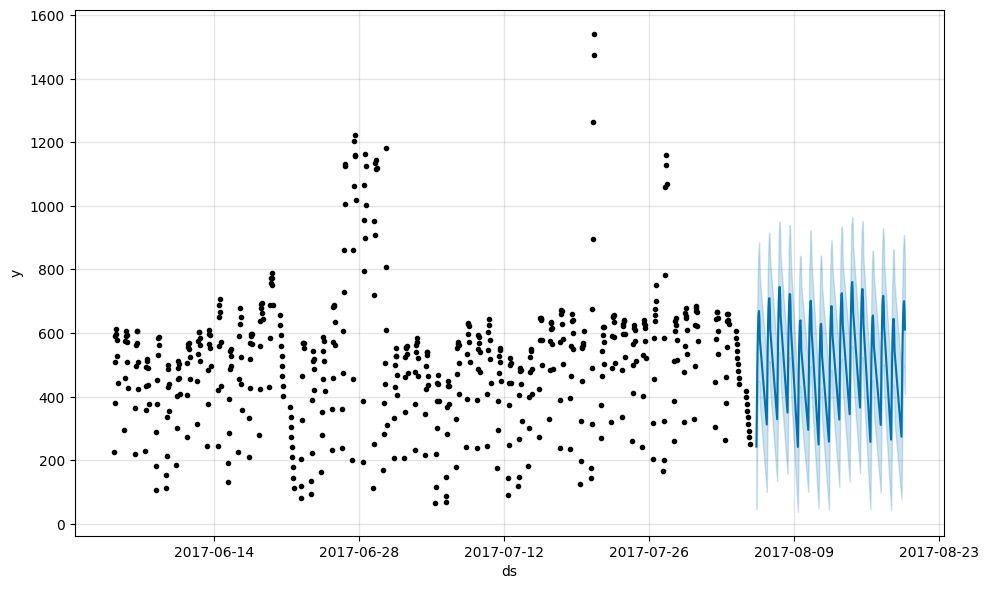

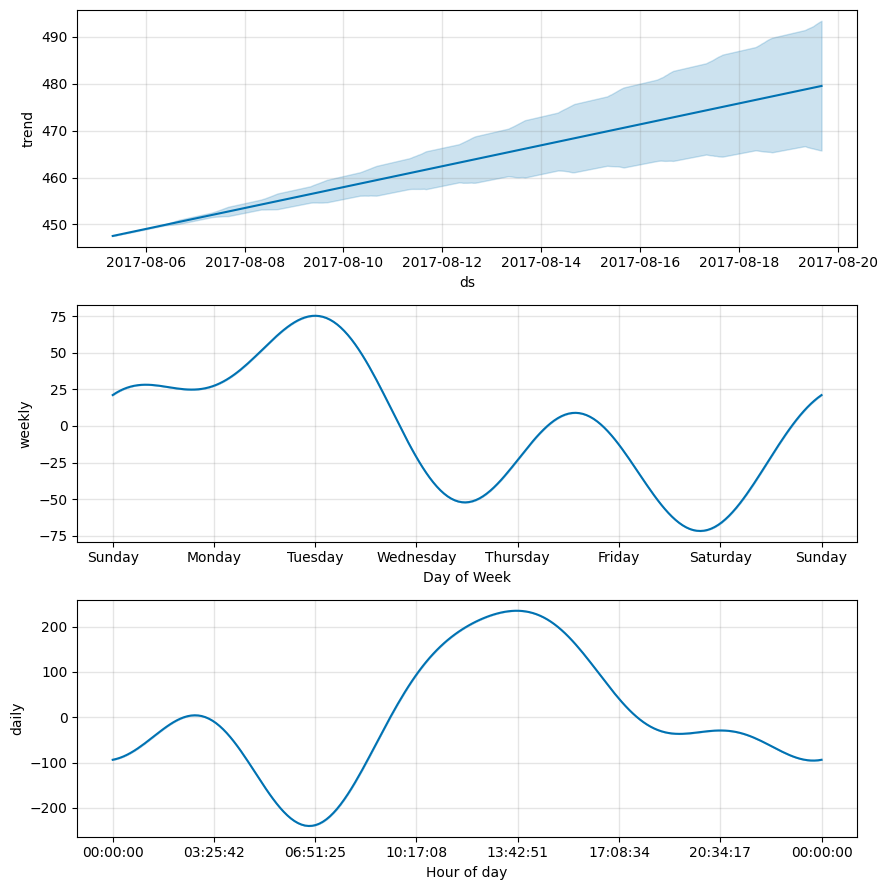

In [132]:
model.plot(forecast_test_prop);
model.plot_components(forecast_test_prop);

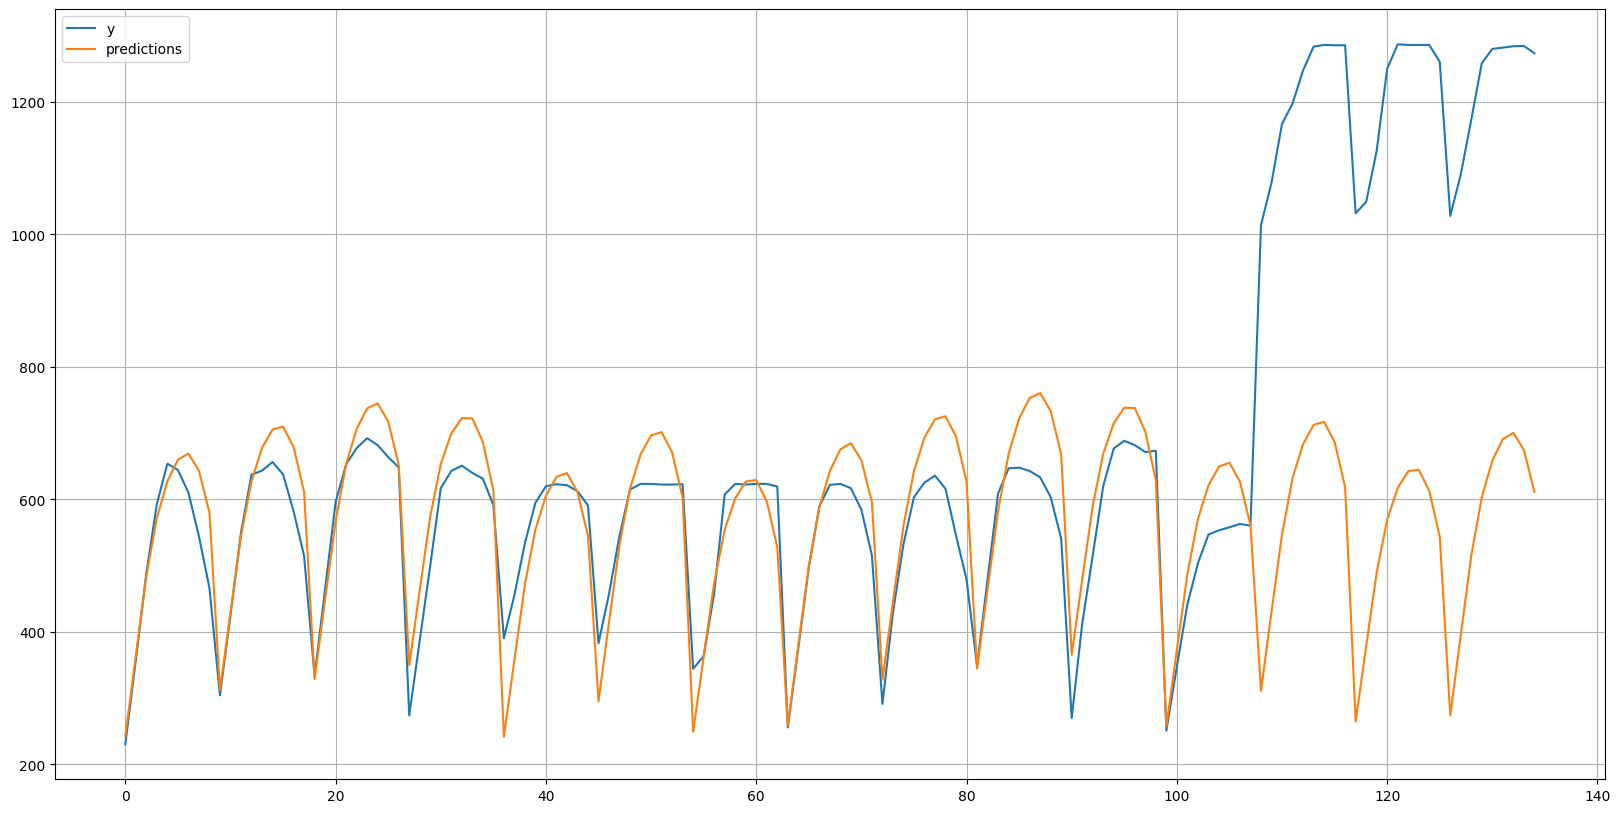

In [133]:
df_0_test_prop.plot(y=['y','predictions'],figsize=(20,10),grid=True);

In [134]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_all_train_prop)

# Make predictions on the test data
forecast_pred_prop = model.predict(df_0_pred_prop[['ds']])
df_0_pred_prop['predictions'] = forecast_pred_prop.yhat

15:20:28 - cmdstanpy - INFO - Chain [1] start processing
15:20:28 - cmdstanpy - INFO - Chain [1] done processing


In [135]:
df_0_pred_prop

,ds,y,predictions
0,2017-08-20 08:00:00,NaN,588.785698
1,2017-08-20 09:00:00,NaN,697.928102
2,2017-08-20 10:00:00,NaN,811.478125
3,2017-08-20 11:00:00,NaN,893.269454
4,2017-08-20 12:00:00,NaN,938.263863
...,...,...,...
58,2017-08-26 12:00:00,NaN,1048.189082
59,2017-08-26 13:00:00,NaN,1073.895234
60,2017-08-26 14:00:00,NaN,1080.356130
61,2017-08-26 15:00:00,NaN,1057.577220


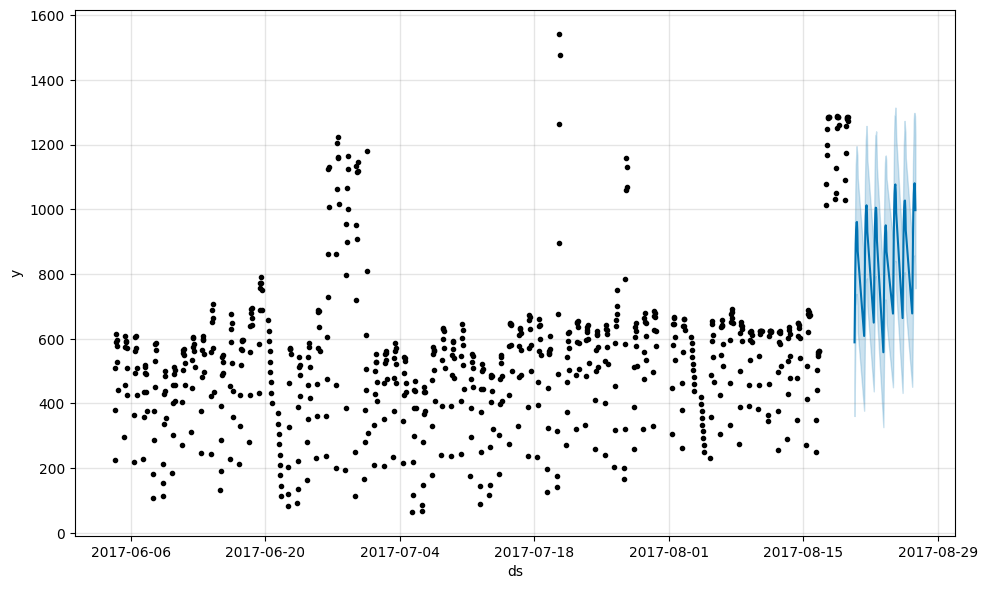

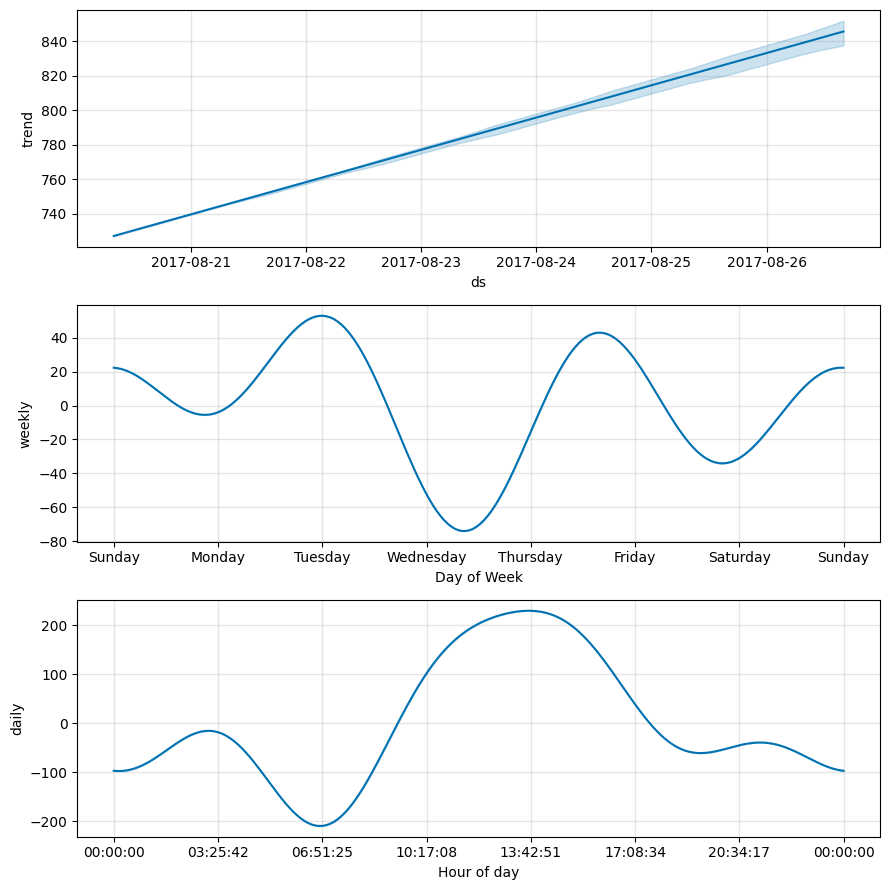

In [136]:
model.plot(forecast_pred_prop);
model.plot_components(forecast_pred_prop);

In [137]:
# Not Good Enough.

## 2) LSTM model

In [138]:
df_0_train_lstm = df_0_train.copy()
df_0_test_lstm = df_0_test.copy()
df_0_all_train_lstm = df_0_all_train.copy()
df_0_pred_lstm = df_0_pred.copy()

In [139]:
df_0_train_lstm

,usage
2017-06-04 08:00:00,225.500000
2017-06-04 09:00:00,380.500000
2017-06-04 10:00:00,509.500000
2017-06-04 11:00:00,590.000000
2017-06-04 12:00:00,613.500000
...,...
2017-08-04 12:00:00,334.842105
2017-08-04 13:00:00,313.973684
2017-08-04 14:00:00,293.105263
2017-08-04 15:00:00,272.236842


In [140]:
df_0_test_lstm

,usage
2017-08-05 08:00:00,230.5
2017-08-05 09:00:00,357.5
2017-08-05 10:00:00,488.5
2017-08-05 11:00:00,593.0
2017-08-05 12:00:00,654.0
...,...
2017-08-19 12:00:00,1280.0
2017-08-19 13:00:00,1282.0
2017-08-19 14:00:00,1284.0
2017-08-19 15:00:00,1284.5


In [141]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

### Train | Test Split

In [142]:
# test_size = 135

In [143]:
# test_ind = len(df_0_all_train) - test_size

In [144]:
# df_0_train_lstm = df_0_all_train.iloc[:test_ind]
# df_0_test_lstm = df_0_all_train.iloc[test_ind:]

### Scaling

In [145]:
scaler = MinMaxScaler()

In [146]:
df_0_train_lstm_scaled = scaler.fit_transform(df_0_train_lstm)
df_0_test_lstm_scaled = scaler.transform(df_0_test_lstm)

### Time Series Generator

In [147]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [148]:
# length = 9 # sequences = (data_size - length) / batch_size + 1
# batch_size = 1
# generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled[:, -1], length = length, batch_size = batch_size)
# test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled[:, -1], length = length, batch_size = batch_size)

In [149]:
length = 9  # sequences = (data_size - length) / batch_size + 1 
batch_size = 1
generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled, length = length, batch_size = batch_size)
test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)

In [150]:
X, y = generator[0]

In [151]:
X.shape

(1, 9, 1)

In [152]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.10870301 0.213681   0.30104978 0.35557061 0.37148662 0.36065019
 0.346766   0.31425669 0.2556722 ]
Predict this y: 
 [[0.15577379]]


### Model and Performance

In [153]:
from tensorflow.keras.callbacks import EarlyStopping

In [154]:
n_features = df_0_train_lstm_scaled.shape[1]

### With Tanh activation func.

In [155]:
model = Sequential()

model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 9, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [157]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [158]:
model.fit(generator,
        epochs = 30,
        validation_data = test_generator,
        callbacks = [early_stop]
        )

Epoch 1/30
540/540 [==============================] - 12s 13ms/step - loss: 0.0195 - val_loss: 0.0284
Epoch 2/30
540/540 [==============================] - 5s 10ms/step - loss: 0.0179 - val_loss: 0.0257
Epoch 3/30
540/540 [==============================] - 6s 11ms/step - loss: 0.0166 - val_loss: 0.0375
Epoch 4/30
540/540 [==============================] - 6s 11ms/step - loss: 0.0143 - val_loss: 0.0359
Epoch 5/30
540/540 [==============================] - 5s 10ms/step - loss: 0.0135 - val_loss: 0.0218
Epoch 6/30
540/540 [==============================] - 5s 9ms/step - loss: 0.0120 - val_loss: 0.0138
Epoch 7/30
540/540 [==============================] - 5s 9ms/step - loss: 0.0111 - val_loss: 0.0085
Epoch 8/30
540/540 [==============================] - 5s 9ms/step - loss: 0.0090 - val_loss: 0.0058
Epoch 9/30
540/540 [==============================] - 5s 9ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 10/30
540/540 [==============================] - 5s 9ms/step - loss: 0.0065 - val_loss: 

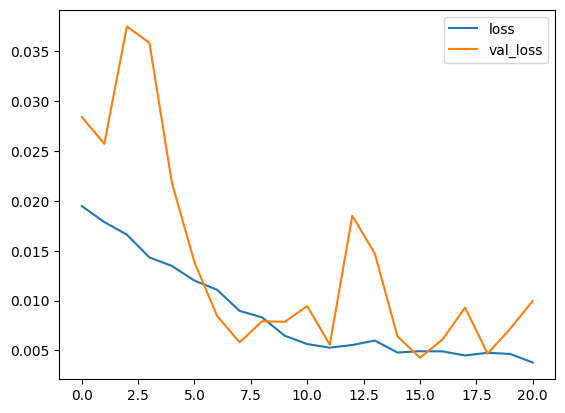

In [159]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [162]:
predictions_scaled = []

first_eval_batch = df_0_test_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):  # for i in range(df_0_test_lstm_scaled.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 22ms/step


### Inverse Transformation and Comparing

In [163]:
predictions = scaler.inverse_transform(np.array(predictions_scaled))

In [164]:
# predictions = scaler.inverse_transform(predictions_scaled)

In [165]:
predictions

array([[339.05298],
       [399.3037 ],
       [489.41373],
       [550.7745 ],
       [575.72205],
       [570.9145 ],
       [546.7218 ],
       [508.20526],
       [453.17093]], dtype=float32)

In [166]:
compare = df_0_test_lstm[:length]
compare['Predictions_tanh'] = predictions
compare

C:\Users\Acer\AppData\Local\Temp\ipykernel_18616\1047576279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_tanh'] = predictions


,usage,Predictions_tanh
2017-08-05 08:00:00,230.5,339.052979
2017-08-05 09:00:00,357.5,399.303711
2017-08-05 10:00:00,488.5,489.413727
2017-08-05 11:00:00,593.0,550.774475
2017-08-05 12:00:00,654.0,575.722046
2017-08-05 13:00:00,644.5,570.914490
2017-08-05 14:00:00,610.5,546.721802
2017-08-05 15:00:00,544.5,508.205261
2017-08-05 16:00:00,466.5,453.170929


In [167]:
# compare = df_0_test_lstm[:134]
# compare['Predictions_tanh'] = predictions
# compare

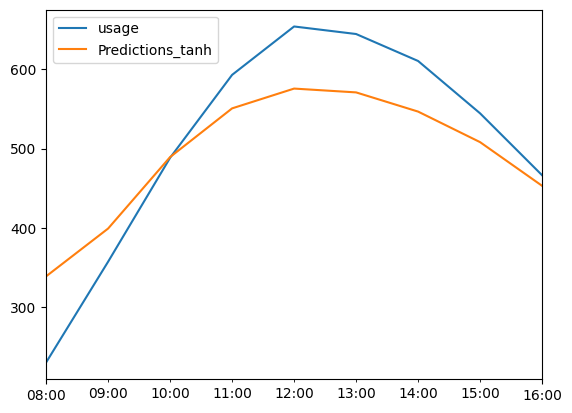

In [168]:
compare.plot();

In [ ]:
eval_metrics(compare.usage, compare.Predictions_tanh)

### with 'relu' activation func

In [ ]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
model.fit(generator,
        epochs = 40,
        validation_data = test_generator,
        # callbacks = [early_stop]
        )

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
# Tanh activation func was better.

### Evaluation on Test Data

In [ ]:
predictions_scaled = []

first_eval_batch = df_0_test_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)
compare['Predictions_relu'] = predictions
compare

In [ ]:
compare.plot();

In [ ]:
eval_metrics(compare.usage, compare.Predictions_relu)

In [ ]:
# predictions_scaled = []

# first_eval_batch = df_0_train_lstm_scaled[-length:]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(length):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
# # Scale the train and test data
# def scale(train, test):
#     scaler = MinMaxScaler(feature_range=(-1, 1))
#     scaler = scaler.fit(train)
#     train_scaled = scaler.transform(train)
#     test_scaled = scaler.transform(test)
#     return scaler, train_scaled, test_scaled

In [ ]:
# scale(df_0_train_lstm , df_0_test_lstm)

In [ ]:
# # Inverse scaling for a forecasted value
# def invert_scale(scaler, X, value):
#     new_row = [x for x in X] + [value]
#     array = np.array(new_row)
#     array = array.reshape(1, len(array))
#     inverted = scaler.inverse_transform(array)
#     return inverted[0, -1]

## Create a new final model

In [ ]:
# df_0_all_train = pd.concat([df_0_train, df_0_test], axis=0)
# df_0_all_train.reset_index(inplace=True)
# df_0_all_train.dropna(inplace=True)
# df_0_all_train['SMA'] = df_0_all_train['usage'].rolling(window=12, min_periods=12).mean()

# model = sm.OLS(df_0_all_train['usage'], df_0_all_train['SMA']).fit()

# 1.Simple model

In [ ]:
# df_0_train_interpolated_spline = df_0_train.interpolate(method='linear' , axis = 0 , inplace=False)

In [ ]:
# plt.plot(df["usage"], label="original data")

# plt.plot(df_0_train_interpolated_spline["usage"], label="spline interpolated data")

# plt.xlabel("timestamp")
# plt.ylabel("usage")

# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse_interpolated_linear_0 = mse(df_0_train['usage'],df_0_train_interpolation_linear['usage'])
print(f'Linear interpolation mse is : {mse_interpolated_linear_0}') # Its usually impossible in practice.

In [ ]:
mse_interpolated_spline = mse(df['usage'],df_interpolated_spline['usage'])
print(f'Spline interpolation mse is : {mse_interpolated_spline}')

In [ ]:
df[(df['month'] == 6) & (df['day'] == 1) & (df['hour'] == 8)]['usage'].sum()

In [ ]:
df_interpolated_linear[(df_interpolated_linear['month'] == 6) & (df_interpolated_linear['day'] == 1) & (df_interpolated_linear['hour'] == 8)]['usage'].sum()

# Problems I've found so far

In [ ]:
# 1) Either the total_capacity of the municipality with id number 1 was entered incorrectly or the usage information of 229 data was entered incorrectly.(
# 1.Option --> Since there is not a big difference, we can assume that a few buses are rented by that municipality. 
# 2.Option --> Or we can think that the buses are counted incorrectly and it will be impossible to exceed the total capacity, and we can equal the ones that exceed the capacity to the upper limit.)


# 2) The time of 2 data was entered incorrectly (Solved correct data entered)
# 3) dtype of timestap feature was object (Solved dtype changed)
# 4) There is quite a bit of data and measurements for 7 o'clock. There is so little data, probably because the buses starts just towards those hours. (Solved +5 minutes and 10 seconds added.)


# 5) While 180 measurements were required, 170 measurements were made at 5 days. (Counting was made 1 time, not 2 times, at the 8th hour of those who were 170) (180 or 170, it doesn't matter)

# 6) On 30 June, 340 measurements were made while it should have been 180. There are datas where 2 measurements are made at intervals of a few seconds. 
# (One of the measurements made at the same minute is deleted. Second measurements are kept)

# 7) We have 18 nan days to handle. (Total 162 hours)
